In [1]:
import pyabf
import numpy as np
import pandas as pd
import scipy
from scipy import signal
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import IsolationForest

# Load and concatenate sweeps (raw data)

ABF (v2.9) with 3 channels (pA, mV, V), sampled at 20.0 kHz, containing 70 sweeps, having no tags, with a total length of 23.48 minutes, recorded with protocol "VC_0.1 Hz_20sec_Stim".
629.9999498776751


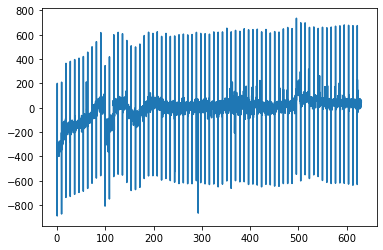

In [18]:
time = np.array([])
cur = np.array([])

# ABF files
data = '2022_10_19_0009.abf'
abf = pyabf.ABF(data)
print(abf)

for i in range(abf.sweepCount):
    abf.setSweep(i)
    time = np.concatenate((time,abf.sweepX))
    cur = np.concatenate((cur,abf.sweepY))

diff = time[1] - time[0]
newtime = [0]
for i in range(1, len(time)):
    newtime.append(newtime[i - 1] + diff)

print(newtime[-1])
plt.plot(newtime,cur)

## Dropping the membrane test from each sweep

In [19]:
time = np.array([])
cur = np.array([])

In [20]:
# ABF files
data = '2022_10_19_0009.abf'
abf = pyabf.ABF(data)
print(abf)

ABF (v2.9) with 3 channels (pA, mV, V), sampled at 20.0 kHz, containing 70 sweeps, having no tags, with a total length of 23.48 minutes, recorded with protocol "VC_0.1 Hz_20sec_Stim".


In [21]:
for i in range(abf.sweepCount):
    abf.setSweep(i)
    time = np.concatenate((time,abf.sweepX[20000:]))
    cur = np.concatenate((cur,abf.sweepY[20000:]))

In [22]:
diff = time[1] - time[0]
newtime = [0]
for i in range(1, len(time)):
    newtime.append(newtime[i - 1] + diff)

In [23]:
newtime[-1]

559.9999498952487

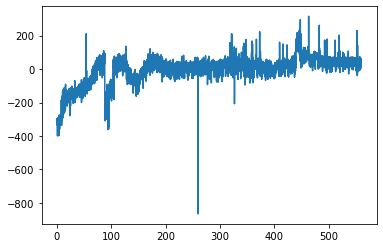

In [24]:
plt.plot(newtime,cur)

## Separate out baseline

ABF (v2.9) with 3 channels (pA, mV, V), sampled at 20.0 kHz, containing 70 sweeps, having no tags, with a total length of 23.48 minutes, recorded with protocol "VC_0.1 Hz_20sec_Stim".


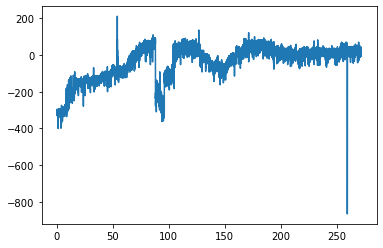

In [35]:
beforeTime = np.array([])
beforeCur = np.array([])
# ABF files
data = '2022_10_19_0009.abf'
abf = pyabf.ABF(data)
print(abf)

for i in range(0,34):
    abf.setSweep(i)
    beforeTime = np.concatenate((beforeTime,abf.sweepX[20000:]))
    beforeCur = np.concatenate((beforeCur,abf.sweepY[20000:]))
    
diff = beforeTime[1] - beforeTime[0]
beforeNewtime = [0]
for i in range(1, len(beforeTime)):
    beforeNewtime.append(beforeNewtime[i - 1] + diff)

plt.plot(beforeNewtime,beforeCur)

ABF (v2.9) with 3 channels (pA, mV, V), sampled at 20.0 kHz, containing 70 sweeps, having no tags, with a total length of 23.48 minutes, recorded with protocol "VC_0.1 Hz_20sec_Stim".


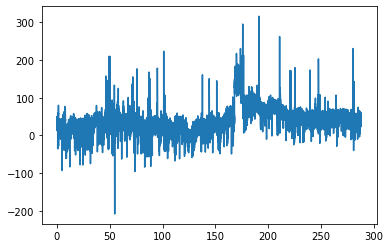

In [36]:
time = np.array([])
cur = np.array([])
# ABF files
data = '2022_10_19_0009.abf'
abf = pyabf.ABF(data)
print(abf)

for i in range(34,70):
    abf.setSweep(i)
    time = np.concatenate((time,abf.sweepX[20000:]))
    cur = np.concatenate((cur,abf.sweepY[20000:]))
    
diff = time[1] - time[0]
newtime = [0]
for i in range(1, len(time)):
    newtime.append(newtime[i - 1] + diff)

plt.plot(newtime,cur)

In [40]:
from matplotlib.pyplot import figure

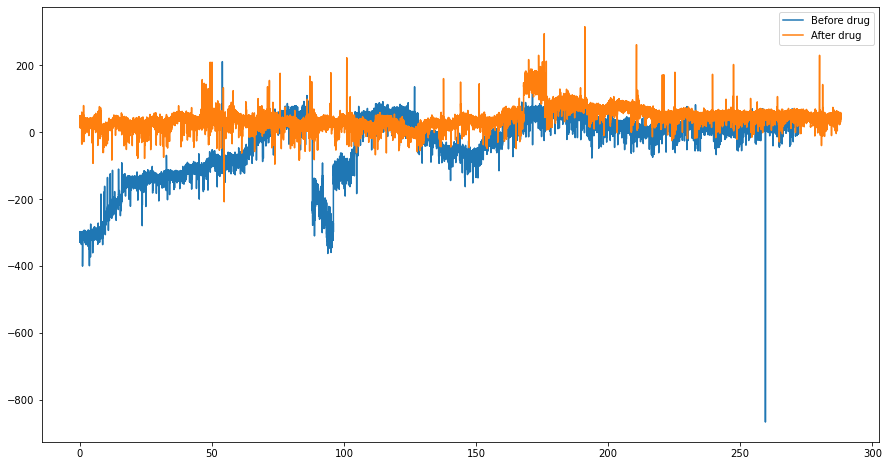

In [47]:
figure(figsize=(15, 8))
plt.plot(beforeNewtime,beforeCur,label='Before drug')
plt.plot(newtime,cur,label='After drug')
plt.legend()
plt.show()

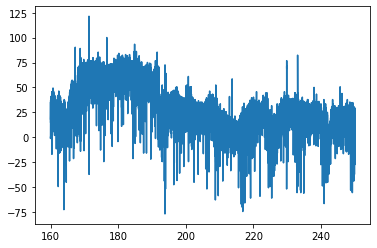

In [65]:
x = beforeNewtime[3200000:5000000]
y = beforeCur[3200000:5000000]
plt.plot(x,y)

- Fit on one and apply on all?
- Fit each one by one?
- dont scale at all?
- try minmax and standard

In [68]:
scaler = StandardScaler()
scaler.fit(y.reshape(-1,1))
y_new = scaler.transform(y.reshape(-1,1))

In [77]:
outliers_fraction = float(.01)
model =  IsolationForest(contamination=outliers_fraction)
data = pd.DataFrame(y_new)
model.fit(data)

IsolationForest(contamination=0.01)

In [78]:
x_after = newtime.copy()
y_after = cur.copy()

#scale 
y_after = scaler.transform(y_after.reshape(-1,1))

In [79]:
df = pd.DataFrame()
df['time'] = x_after
df['current'] =  y_after

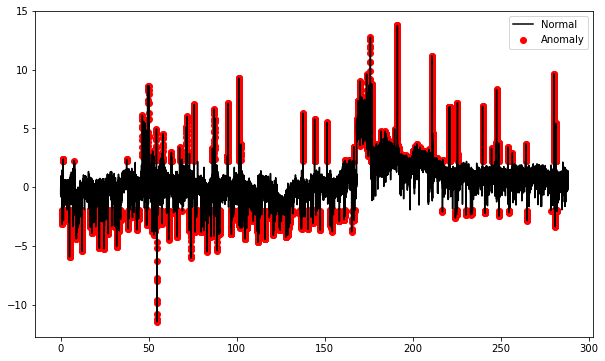

In [80]:
df['anomaly'] = model.predict(y_after)
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df.anomaly == -1, ['time','current']] #anomaly
ax.plot(df.time, df['current'], color='black', label = 'Normal')
ax.scatter(a.time,a['current'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

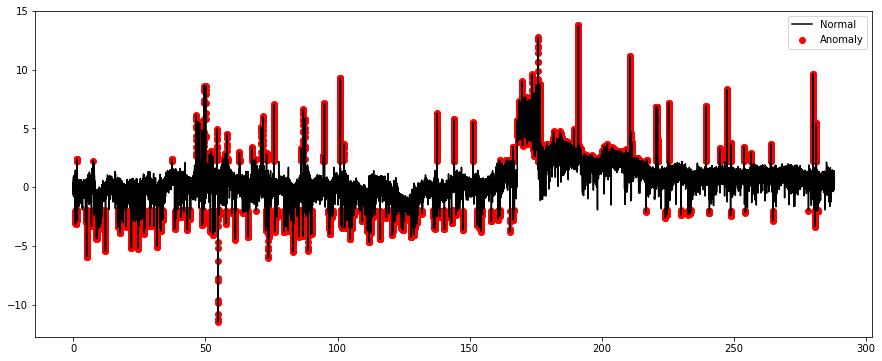

In [81]:
# visualization
fig, ax = plt.subplots(figsize=(15,6))
a = df.loc[df.anomaly == -1, ['time','current']] #anomaly
ax.plot(df.time, df['current'], color='black', label = 'Normal')
ax.scatter(a.time,a['current'], color='red', label = 'Anomaly')
plt.legend()
plt.show();